In [9]:
import numpy as np 
import pandas as pd
import seaborn as sns
df = pd.read_csv("Loan dataset_classification.csv")
print(df.isnull().sum())
#sns.heatmap(df.isnull(),cbar=False)

print(df["Married"].mode())
df["Married"]=df["Married"].fillna((df["Married"].mode()[0]))
print(df.isnull().sum())

Loan_ID                0
Gender                24
Married                3
Dependents            25
Education              0
Self_Employed         55
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            27
Loan_Amount_Term      20
Credit_History        79
Property_Area          0
Loan_Status          367
dtype: int64
0    Yes
Name: Married, dtype: str
Loan_ID                0
Gender                24
Married                0
Dependents            25
Education              0
Self_Employed         55
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            27
Loan_Amount_Term      20
Credit_History        79
Property_Area          0
Loan_Status          367
dtype: int64


In [13]:
#TARGET variable analysis
df['Loan_Status'].value_counts()
df['Loan_Status'].value_counts(normalize=True)*100
#df['Loan_Status'].value_counts(normalize=True).plot.bar()
print(df)

      Loan_ID Gender Married Dependents     Education Self_Employed  \
0    LP001002   Male      No          0      Graduate            No   
1    LP001003   Male     Yes          1      Graduate            No   
2    LP001005   Male     Yes          0      Graduate           Yes   
3    LP001006   Male     Yes          0  Not Graduate            No   
4    LP001008   Male      No          0      Graduate            No   
..        ...    ...     ...        ...           ...           ...   
976  LP002971   Male     Yes         3+  Not Graduate           Yes   
977  LP002975   Male     Yes          0      Graduate            No   
978  LP002980   Male      No          0      Graduate            No   
979  LP002986   Male     Yes          0      Graduate            No   
980  LP002989   Male      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849                0.0         NaN             360.0   
1

<Axes: >

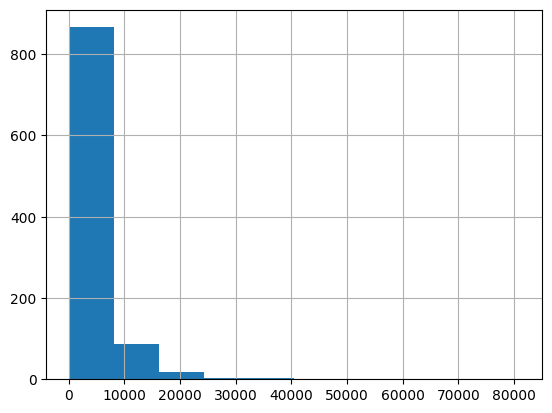

In [ ]:
df['ApplicantIncome'].hist()



<Axes: >

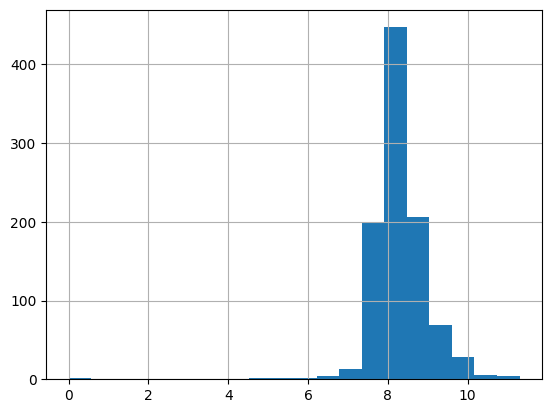

In [16]:
df['ApplicantIncome_log']=np.log(df['ApplicantIncome']+1)
df['ApplicantIncome_log'].hist(bins=20)

<Axes: >

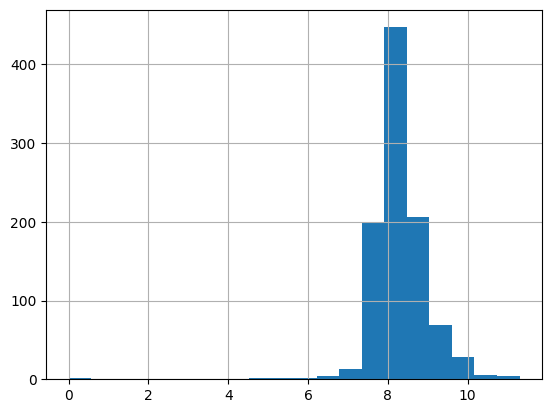

In [17]:
df['ApplicantIncome_log']=np.log(df['ApplicantIncome']+1)
df['ApplicantIncome_log'].hist(bins=20)

<Axes: xlabel='Credit_History', ylabel='count'>

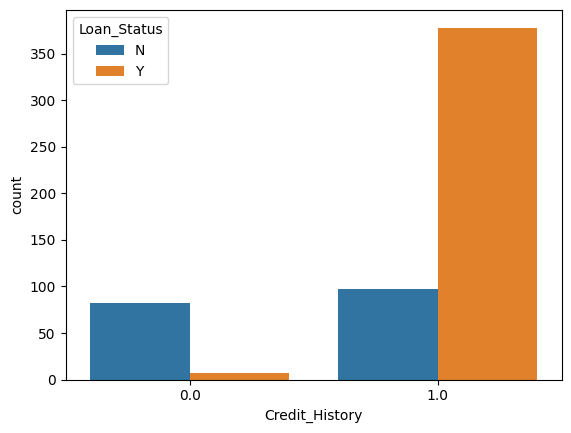

In [20]:
pd.crosstab(df["Credit_History"],df["Loan_Status"])
sns.countplot(x='Credit_History',hue='Loan_Status',data=df)

In [ ]:
pd.crosstab(df["Credit_History"],df["Loan_Status"])
sns.countplot(x='Credit_History',hue='Loan_Status',data=df)

In [23]:
print(df["Married"].unique())
df["Married"]=df["Married"].fillna(df["Married"].mode())
df["Married"] = df["Married"].map({"No": 0, "Yes": 1})
print(df["Married"].unique())


print(df["Self_Employed"].unique())
df["Self_Employed"]=df["Self_Employed"].fillna(df["Self_Employed"].mode()[0])
df["Self_Employed"] = df["Self_Employed"].map({"No": 0, "Yes": 1})
print(df["Self_Employed"].unique())

print(df["Education"].unique())
df["Education"]=df["Education"].fillna(df["Education"].mode())
df["Education"] = df["Education"].map({"Not Graduate": 0, "Graduate": 1})
print(df["Education"].unique())

print(df["Property_Area"].unique())
df["Property_Area"]=df["Property_Area"].fillna(df["Property_Area"].mode())
df["Property_Area"] = df["Property_Area"].map({"Urban": 0, "Rural": 1,"Semiurban":2 })
print(df["Property_Area"].unique())

df.fillna({"ApplicantIncome":np.median(df["ApplicantIncome"])})
df.fillna({"CoapplicantIncome":np.median(df["CoapplicantIncome"])},inplace=True)
df["LoanAmount"] = df["LoanAmount"].fillna(df["LoanAmount"].median())
df["Loan_Amount_Term"] = df["Loan_Amount_Term"].fillna(df["Loan_Amount_Term"].median())
df["Credit_History"] = df["Credit_History"].fillna(0)
df["ApplicantIncome_log"]= np.log(df["ApplicantIncome"])
df["CoApplicantIncome_log"]= np.log(df["CoapplicantIncome"])


df.isnull().sum()





[0 1]
[nan]
<StringArray>
['No', 'Yes', nan]
Length: 3, dtype: str
[0 1]
<StringArray>
['Graduate', 'Not Graduate']
Length: 2, dtype: str
[1 0]
[0 1 2]
[nan]


c:\Users\Administrator\Desktop\AI-ML\.venv\Lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Loan_ID                    0
Gender                    24
Married                  981
Dependents                25
Education                  0
Self_Employed              0
ApplicantIncome            0
CoapplicantIncome          0
LoanAmount                 0
Loan_Amount_Term           0
Credit_History             0
Property_Area            981
Loan_Status              367
ApplicantIncome_log        0
CoApplicantIncome_log      0
dtype: int64

In [22]:
df.isnull().sum()

Loan_ID                  0
Gender                  24
Married                  0
Dependents              25
Education                0
Self_Employed           55
ApplicantIncome          0
CoapplicantIncome        0
LoanAmount              27
Loan_Amount_Term        20
Credit_History          79
Property_Area            0
Loan_Status            367
ApplicantIncome_log      0
dtype: int64

In [24]:
train_df = df[df["Loan_Status"].notna()]
test_df=df[df["Loan_Status"].isna()]
print(test_df)

      Loan_ID Gender  Married Dependents  Education  Self_Employed  \
614  LP001015   Male      NaN          0          1              0   
615  LP001022   Male      NaN          1          1              0   
616  LP001031   Male      NaN          2          1              0   
617  LP001035   Male      NaN          2          1              0   
618  LP001051   Male      NaN          0          0              0   
..        ...    ...      ...        ...        ...            ...   
976  LP002971   Male      NaN         3+          0              1   
977  LP002975   Male      NaN          0          1              0   
978  LP002980   Male      NaN          0          1              0   
979  LP002986   Male      NaN          0          1              0   
980  LP002989   Male      NaN          0          1              1   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
614             5720                0.0       110.0             360.0   
615          

In [38]:
# Features (all columns except target)
print(df["Married"].unique())
df["Married"]=df["Married"].fillna(df["Married"].mode())
df["Married"] = df["Married"].map({"No": 0, "Yes": 1})
print(df["Married"].unique())


print(df["Self_Employed"].unique())
#df["Self_Employed"]=df["Self_Employed"].fillna(df["Self_Employed"].mode()[0])
df["Self_Employed"] = df["Self_Employed"].map({"No": 0, "Yes": 1})
print(df["Self_Employed"].unique())

print(df["Education"].unique())
df["Education"]=df["Education"].fillna(df["Education"].mode())
df["Education"] = df["Education"].map({"Not Graduate": 0, "Graduate": 1})
print(df["Education"].unique())

print(df["Property_Area"].unique())
df["Property_Area"]=df["Property_Area"].fillna(df["Property_Area"].mode())
df["Property_Area"] = df["Property_Area"].map({"Urban": 0, "Rural": 1,"Semiurban":2 })
print(df["Property_Area"].unique())

df.fillna({"ApplicantIncome":np.median(df["ApplicantIncome"])})
df.fillna({"CoapplicantIncome":np.median(df["CoapplicantIncome"])},inplace=True)
df["LoanAmount"] = df["LoanAmount"].fillna(df["LoanAmount"].median())
df["Loan_Amount_Term"] = df["Loan_Amount_Term"].fillna(df["Loan_Amount_Term"].median())
df["Credit_History"] = df["Credit_History"].fillna(0)
df["ApplicantIncome_log"]= np.log(df["ApplicantIncome"])
df["CoApplicantIncome_log"]= np.log(df["CoapplicantIncome"])

df.isnull().sum()


train_df=df[df["Loan_Status"].notna()]
test_df= df[df["Loan_Status"].isna()]

X = train_df[[
    'Married',
    'Education',
    'Self_Employed',
    'ApplicantIncome_log',
    'CoApplicantIncome_log',
    'LoanAmount',
    'Loan_Amount_Term',
    'Credit_History',
    'Property_Area',
    
]]

y =  train_df[["Loan_Status"]]

#model = LogisticRegression() ## created blank model
#model.fit(X, y) # train the model


#p3=[1,1,0,np.log(3200),np.log(700),70,360,1,0]
#p1=[0,0,0,np.log(3596),0,100,240,0,0]


#print(model.predict([p1])) ## checking how it learnt

[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]


c:\Users\Administrator\Desktop\AI-ML\.venv\Lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
